In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Membaca dataset
df = pd.read_csv(r"C:\Users\OPTION\Downloads\Python DA\[BELUM] Projects 2_FIFA World Cup (1930 - 2018) Dashboard By Alfin Bahru Rahmika Umar\WorldCupPlayers.csv")
df

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro (ARG),N,19,ALVAREZ,NaN,NaN
37780,255959,300186501,GER,LOEW Joachim (GER),N,6,KHEDIRA,NaN,NaN
37781,255959,300186501,ARG,SABELLA Alejandro (ARG),N,20,AGUERO,NaN,IH46' Y65'
37782,255959,300186501,GER,LOEW Joachim (GER),N,21,MUSTAFI,NaN,NaN


In [3]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (37784, 9)


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


,RoundID,MatchID,Shirt Number
count,3.778400e+04,3.778400e+04,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022
std,2.770144e+07,1.123916e+08,6.960138
min,2.010000e+02,2.500000e+01,0.000000
25%,2.630000e+02,1.199000e+03,5.000000
50%,3.370000e+02,2.216000e+03,11.000000
75%,2.559310e+05,9.741000e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000


In [14]:
# Salin data awal untuk perbandingan
df_original = df.copy()

# --- Deteksi Data Duplikat ---
print("Jumlah data duplikat awal:", df.duplicated().sum())

# --- Deteksi Missing Values ---
print("Missing values sebelum cleaning:\n", df.isnull().sum())

Jumlah data duplikat awal: 736
Missing values sebelum cleaning:
 RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64


Jumlah data outlier: 2943


C:\Users\OPTION\AppData\Local\Temp\ipykernel_11788\2136988155.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)
C:\Users\OPTION\AppData\Local\Temp\ipykernel_11788\2136988155.py:18: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


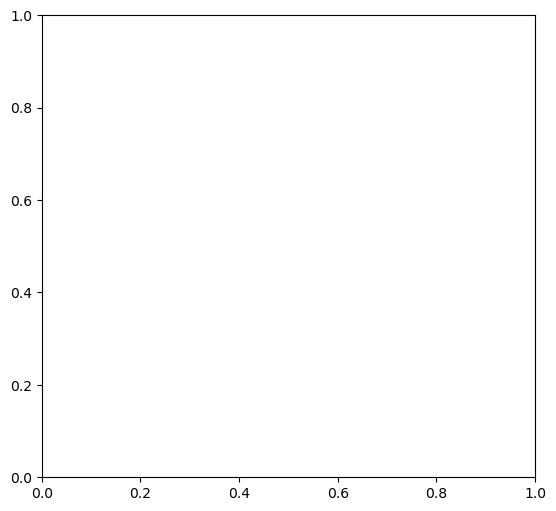

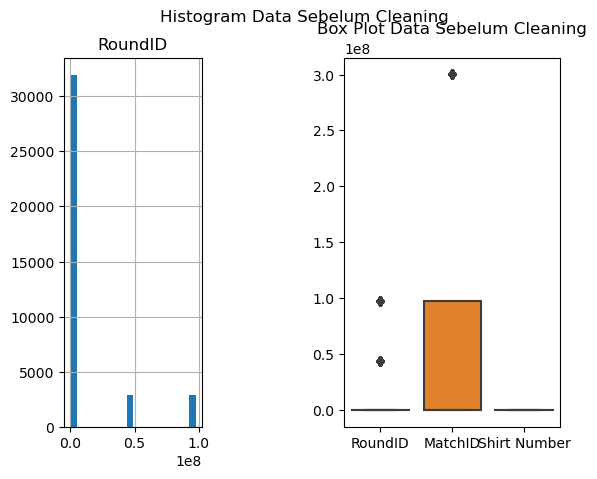

In [15]:
# --- Deteksi Outlier ---
# Misalnya, kita deteksi outlier pada kolom numerik: RoundID, MatchID, Shirt Number
numeric_cols = ['RoundID', 'MatchID', 'Shirt Number']
z_scores = np.abs(stats.zscore(df[numeric_cols]))
# Kita anggap threshold z-score > 3 sebagai outlier
outlier_mask = (z_scores > 3).any(axis=1)
print("Jumlah data outlier:", outlier_mask.sum())

# --- Visualisasi Data Sebelum Cleaning ---
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df[numeric_cols].hist(bins=20, layout=(1,3))
plt.suptitle('Histogram Data Sebelum Cleaning')

plt.subplot(1,2,2)
sns.boxplot(data=df[numeric_cols])
plt.title('Box Plot Data Sebelum Cleaning')
plt.tight_layout()
plt.show()

C:\Users\OPTION\AppData\Local\Temp\ipykernel_11788\2576804880.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_clean[~outlier_mask]
C:\Users\OPTION\AppData\Local\Temp\ipykernel_11788\2576804880.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)
C:\Users\OPTION\AppData\Local\Temp\ipykernel_11788\2576804880.py:20: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


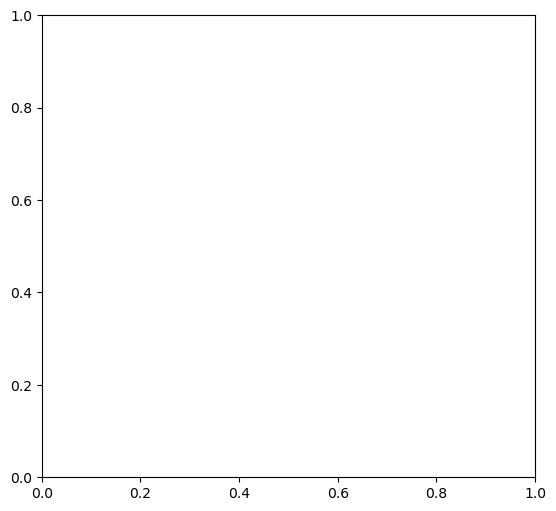

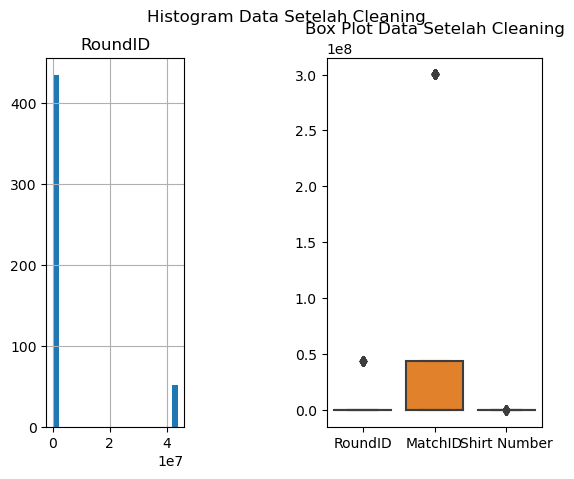

In [25]:
# --- Data Cleaning ---
# Hapus data duplikat
df_cleaned = df.drop_duplicates()

# Hapus missing values
df_cleaned = df_clean.dropna()

# Hapus outlier
df_cleaned = df_clean[~outlier_mask]

# --- Visualisasi Data Setelah Cleaning ---
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df_clean[numeric_cols].hist(bins=20, layout=(1,3))
plt.suptitle('Histogram Data Setelah Cleaning')

plt.subplot(1,2,2)
sns.boxplot(data=df_cleaned[numeric_cols])
plt.title('Box Plot Data Setelah Cleaning')
plt.tight_layout()
plt.show()

In [26]:
# Perbandingan jumlah data
print("Jumlah data sebelum cleaning:", df.shape[0])
print("Jumlah data setelah cleaning:", df_clean.shape[0])

# Simpan dataset yang telah dibersihkan
df_cleaned.to_csv('WorldCupPlayers-CLEANED.csv', index=False)
print("Dataset cleaned disimpan sebagai 'WorldCupPlayers-CLEANED.csv'")

Jumlah data sebelum cleaning: 37784
Jumlah data setelah cleaning: 487
Dataset cleaned disimpan sebagai 'WorldCupPlayers-CLEANED.csv'


In [27]:
# --- Menghitung Metrik Terukur ---
jumlah_pemain = df_cleaned['Player Name'].nunique()
jumlah_tim = df_cleaned['Team Initials'].nunique()
jumlah_pelatih = df_cleaned['Coach Name'].nunique()
total_pertandingan = df_cleaned['MatchID'].nunique()

# Menampilkan metrik pada console
print("Jumlah Pemain      :", jumlah_pemain)
print("Jumlah Tim         :", jumlah_tim)
print("Jumlah Pelatih     :", jumlah_pelatih)
print("Total Pertandingan :", total_pertandingan)

Jumlah Pemain      : 309
Jumlah Tim         : 70
Jumlah Pelatih     : 206
Total Pertandingan : 374


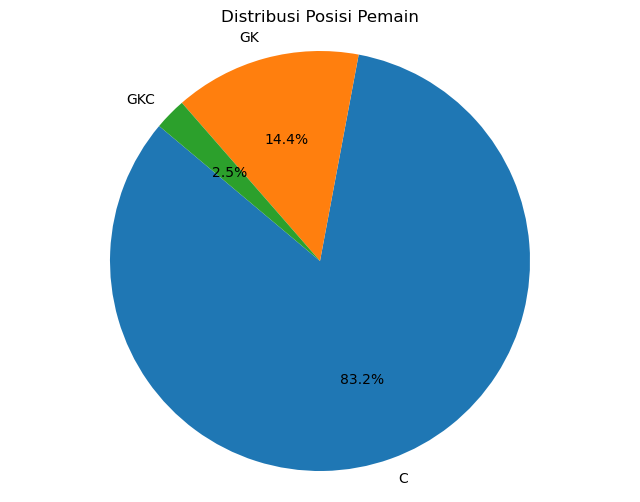

In [30]:
# --- Visualisasi dengan Matplotlib dan Seaborn ---

# 1. Pie Chart untuk distribusi Posisi Pemain
# Hanya hitung jika data posisi tidak null
position_counts = df_cleaned['Position'].dropna().value_counts()

plt.figure(figsize=(8, 6))
plt.pie(position_counts.values, labels=position_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Posisi Pemain')
plt.axis('equal')
plt.show()

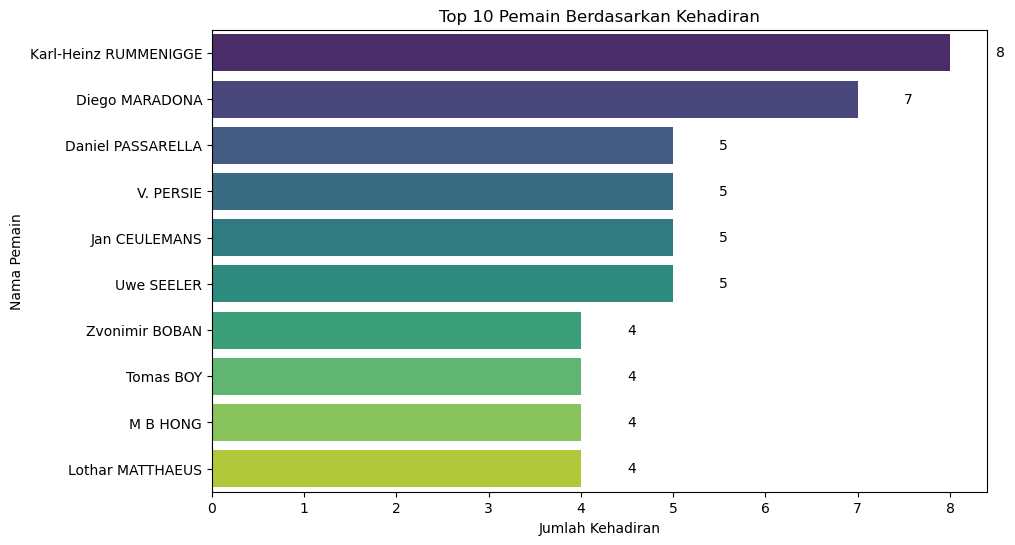

In [29]:
# 2. Horizontal Bar Chart untuk Top 10 Pemain Berdasarkan Kehadiran
# Menghitung jumlah kemunculan tiap pemain
player_counts = df_cleaned['Player Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=player_counts.values, y=player_counts.index, palette="viridis", orient='h')
plt.title('Top 10 Pemain Berdasarkan Kehadiran')
plt.xlabel('Jumlah Kehadiran')
plt.ylabel('Nama Pemain')

# Menampilkan detail nilai pada tiap bar
for i, v in enumerate(player_counts.values):
    ax.text(v + 0.5, i, str(v), color='black', va='center')
plt.show()

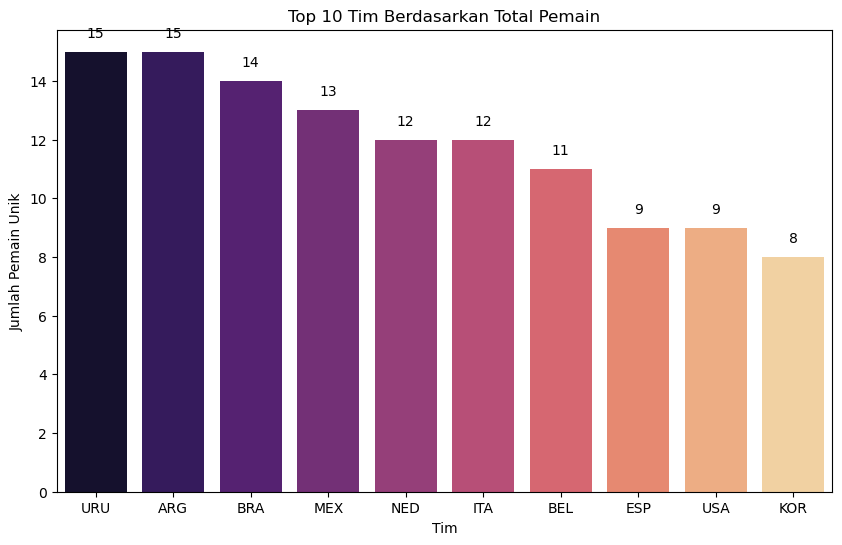

In [28]:
# 3. Bar Chart untuk Top 10 Tim Berdasarkan Total Pemain (Unique Player)
# Menghitung jumlah pemain unik per tim
team_player_counts = df_cleaned.groupby('Team Initials')['Player Name'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x=team_player_counts.index, y=team_player_counts.values, palette="magma")
plt.title('Top 10 Tim Berdasarkan Total Pemain')
plt.xlabel('Tim')
plt.ylabel('Jumlah Pemain Unik')

# Menampilkan detail nilai pada tiap bar
for i, v in enumerate(team_player_counts.values):
    ax2.text(i, v + 0.5, str(v), color='black', ha='center')
plt.show()

In [31]:
import dash
from dash import dcc, html
import plotly.express as px

# Menghitung metrik terukur
total_players = df_clean['Player Name'].nunique()
total_teams = df_clean['Team Initials'].nunique()
total_coaches = df_clean['Coach Name'].nunique()
total_matches = df_clean['MatchID'].nunique()

# Pie Chart: Distribusi Posisi Pemain
# Beberapa nilai pada kolom 'Position' mungkin kosong, kita hitung yang tidak kosong
position_counts = df_clean['Position'].value_counts()
fig_pie = px.pie(values=position_counts.values, 
                 names=position_counts.index,
                 title='Distribusi Posisi Pemain')

# Horizontal Bar Chart: Top 10 Pemain Berdasarkan Kehadiran (jumlah kemunculan)
player_counts = df_clean['Player Name'].value_counts().head(10)
fig_bar_player = px.bar(player_counts, 
                        orientation='h',
                        title='Top 10 Pemain Berdasarkan Kehadiran',
                        labels={'index': 'Player Name', 'value': 'Kehadiran'})
fig_bar_player.update_traces(text=player_counts.values, textposition='outside')

# Bar Chart: Top 10 Tim Berdasarkan Total Pemain (berdasarkan jumlah unique player per tim)
team_player_counts = df_clean.groupby('Team Initials')['Player Name'].nunique().sort_values(ascending=False).head(10)
fig_bar_team = px.bar(team_player_counts, 
                      title='Top 10 Tim Berdasarkan Total Pemain',
                      labels={'Team Initials': 'Team', 'Player Name': 'Jumlah Pemain'})
fig_bar_team.update_traces(text=team_player_counts.values, textposition='outside')

# Membuat dashboard sederhana dengan Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Dashboard Analisis World Cup Players"),
    html.Div([
        html.Div([
            html.H3("Jumlah Pemain"),
            html.P(total_players)
        ], style={'width': '24%', 'display': 'inline-block', 'text-align': 'center'}),
        html.Div([
            html.H3("Jumlah Tim"),
            html.P(total_teams)
        ], style={'width': '24%', 'display': 'inline-block', 'text-align': 'center'}),
        html.Div([
            html.H3("Jumlah Pelatih"),
            html.P(total_coaches)
        ], style={'width': '24%', 'display': 'inline-block', 'text-align': 'center'}),
        html.Div([
            html.H3("Total Pertandingan"),
            html.P(total_matches)
        ], style={'width': '24%', 'display': 'inline-block', 'text-align': 'center'})
    ], style={'display': 'flex', 'justify-content': 'space-between'}),
    html.Div([
        dcc.Graph(figure=fig_pie)
    ]),
    html.Div([
        dcc.Graph(figure=fig_bar_player)
    ]),
    html.Div([
        dcc.Graph(figure=fig_bar_team)
    ])
])

if __name__ == '__main__':
    app.run_server(debug=True)
